In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.pandas.set_option('display.max_columns', None)

In [6]:
X_train_scaled = pd.read_csv('../data/train_scaled.csv')
X_val_scaled = pd.read_csv('../data/val_scaled.csv')

X_train_scaled.head()

,id,tip_amount,VendorID_2,VendorID_1,passenger_count,trip_distance,RatecodeID_one,RatecodeID_two,RatecodeID_five,RatecodeID_three,RatecodeID_four,store_and_fwd_flag_N,store_and_fwd_flag_Y,PULocationID_OTHER,PULocationID_236,PULocationID_186,PULocationID_161,PULocationID_230,PULocationID_237,PULocationID_234,PULocationID_162,PULocationID_48,PULocationID_170,DOLocationID_236,DOLocationID_OTHER,DOLocationID_186,DOLocationID_48,DOLocationID_230,DOLocationID_170,DOLocationID_161,DOLocationID_234,DOLocationID_237,DOLocationID_162,payment_type_one,payment_type_two,payment_type_three,payment_type_four,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_seconds,pickup_hour,pickup_min,pickup_sec,dropoff_hour,dropoff_min,dropoff_sec,trip_day
0,1,1.96,1.0,0.0,0.2,0.049380,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.680321,0.000000,1.0,0.0,0.0,0.537155,0.006259,0.521739,0.169492,0.0,0.521739,0.338983,0.0,0.166667
1,11,1.00,1.0,0.0,0.0,0.072002,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.700391,0.222222,1.0,0.0,0.0,0.560787,0.006259,0.782609,0.203390,0.0,0.782609,0.372881,0.0,0.166667
2,13,0.00,0.0,1.0,0.0,0.024325,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.690859,0.222222,1.0,0.0,0.0,0.537656,0.009736,0.782609,0.474576,0.0,0.782609,0.728814,0.0,0.300000
3,14,0.00,1.0,0.0,0.0,0.075894,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.720873,0.000000,1.0,0.0,0.0,0.566045,0.009736,0.478261,0.067797,0.0,0.478261,0.322034,0.0,0.333333
4,15,2.36,1.0,0.0,0.0,0.051569,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.690859,0.222222,1.0,0.0,0.0,0.564592,0.007650,0.695652,0.745763,0.0,0.695652,0.949153,0.0,0.633333


In [7]:
y_train = X_train_scaled['tip_amount']
y_val = X_val_scaled['tip_amount']

In [9]:
# load selected features
selected_features = pd.read_csv('../data/selected_features.csv', header=None)

# pull items from series into a list
selected_features = [x for x in selected_features[0]]
selected_features

['trip_distance',
 'RatecodeID_one',
 'DOLocationID_OTHER',
 'payment_type_one',
 'tolls_amount',
 'total_amount',
 'pickup_hour',
 'trip_day']

In [11]:
X_train_scaled = X_train_scaled[selected_features]
X_val_scaled = X_val_scaled[selected_features]

### Regularized linear regression

In [12]:
# model fit then feature selection
# alpha: penalty, the larger the fewer features selected
# sel_: will select features that are non-zero

lasso = Lasso(alpha=0.005, random_state=1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
# evaluate the model 
# first: transform both target and features back to original values (previously log transformed)

train_pred = lasso.predict(X_train_scaled)

print(f'Lasso train MSE: {mean_squared_error(np.exp(y_train), np.exp(train_pred))}')
print(f'Lasso train RMSE: {sqrt(mean_squared_error(np.exp(y_train), np.exp(train_pred)))}')

Lasso train MSE: 1.306079025298135e+83
Lasso train RMSE: 3.613971534611383e+41


In [16]:
val_pred = lasso.predict(X_val_scaled)

print(f'Lasso test MSE: {mean_squared_error(np.exp(y_val), np.exp(val_pred))}')
print(f'Lasso test RMSE: {sqrt(mean_squared_error(np.exp(y_val), np.exp(val_pred)))}')

Lasso test MSE: 5.462951123236034e+58
Lasso test RMSE: 2.3372956858805936e+29


In [17]:
print(f'Average tip amount: {np.exp(y_train).median()}')

Average tip amount: 4.263114515168817


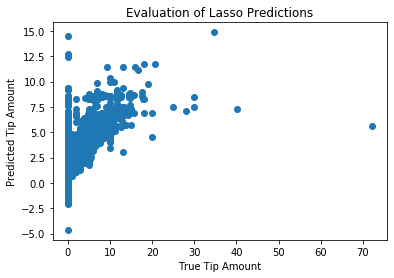

In [18]:
# plot predictions 
plt.scatter(y_val, val_pred)
plt.xlabel('True Tip Amount')
plt.ylabel('Predicted Tip Amount')
plt.title('Evaluation of Lasso Predictions');

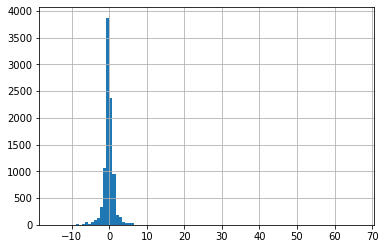

In [20]:
# evaluate distribution of errors (should be normally distributed or Gaussian)

errors = y_val - val_pred

errors.hist(bins=100)

### Feature importance

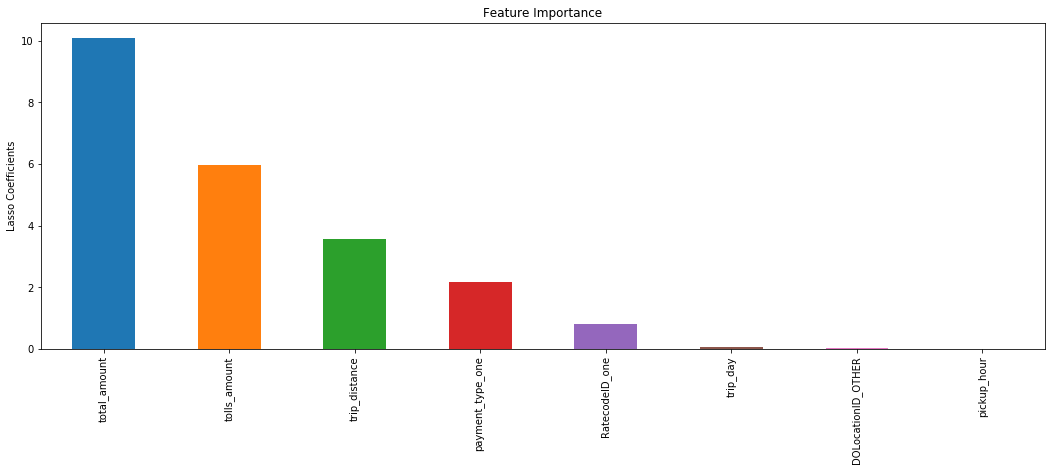

In [24]:
importance = pd.Series(np.abs(lasso.coef_.ravel()))
importance.index = selected_features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance');